In [1]:
import torch
from train_dnn_seg import prepare_dataloader

configs = {
    "window_duration": 0.04,
    "window_shift": 0.02,
    "n_frames": 49,
    "n_mels": 40,
    "n_feature": 40,
    "feature_type": "fbanks",
    "learing_rate": 0.001,
    "batch_size": 64,       # 64*10=640
    "p_dropout": 0,
    "model_type": "dnn"
}
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")

train_loader, dev_loader, eval_loader = prepare_dataloader(configs)
print("Data preparing done")

(3008, 10, 1960)
(379, 10, 1960)
(330, 10, 1960)
train:	3008, 47
dev:	379, 6
eval:	330, 6
Data preparing done


In [8]:
from train_dnn_seg import train
from dnn_model import DNN3

model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/dnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.6017, dev acc=0.5047, dev wav acc=0.5119| Model saving...
Epoch-2: train loss=1.3488, dev acc=0.5660, dev wav acc=0.5963| Model saving...
Epoch-3: train loss=1.2703, dev acc=0.5641, dev wav acc=0.6148 
Epoch-4: train loss=1.2130, dev acc=0.5786, dev wav acc=0.6095| Model saving...
Epoch-5: train loss=1.1596, dev acc=0.5799, dev wav acc=0.6069| Model saving...
Epoch-6: train loss=1.0933, dev acc=0.5876, dev wav acc=0.6095| Model saving...
Epoch-7: train loss=1.0712, dev acc=0.6388, dev wav acc=0.6834| Model saving...
Epoch-8: train loss=1.0560, dev acc=0.6433, dev wav acc=0.6992| Model saving...
Epoch-9: train loss=0.9979, dev acc=0.6100, dev wav acc=0.6517 
Epoch-10: train loss=0.9627, dev acc=0.6303, dev wav acc=0.6728 
Epoch-11: train loss=0.9134, dev acc=0.6612, dev wav acc=0.7203| Model saving...
Epoch-12: train loss=0.9093, dev acc=0.6580, dev wav acc=0.7018 
Epoch-13: train loss=0.8804, dev acc=0.6612, dev wav acc=0.7230 
Epoch-14: train

In [9]:
from train_dnn_seg import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4518, wav=0.4606
2-test accurary: segs=0.4979, wav=0.5152
3-test accurary: segs=0.4503, wav=0.4667
4-test accurary: segs=0.4827, wav=0.5121
5-test accurary: segs=0.4830, wav=0.5030
6-test accurary: segs=0.4961, wav=0.5152
7-test accurary: segs=0.4921, wav=0.5182
8-test accurary: segs=0.5024, wav=0.5394
9-test accurary: segs=0.4636, wav=0.4758
10-test accurary: segs=0.4797, wav=0.5121
11-test accurary: segs=0.5064, wav=0.5394
12-test accurary: segs=0.5045, wav=0.5485
13-test accurary: segs=0.4730, wav=0.5000
14-test accurary: segs=0.5021, wav=0.5303
15-test accurary: segs=0.4882, wav=0.5364
16-test accurary: segs=0.4961, wav=0.5273
17-test accurary: segs=0.5082, wav=0.5424
18-test accurary: segs=0.5106, wav=0.5455
19-test accurary: segs=0.4752, wav=0.5273
20-test accurary: segs=0.5179, wav=0.5667
21-test accurary: segs=0.5300, wav=0.5515
22-test accurary: segs=0.5130, wav=0.5485
23-test accurary: segs=0.4942, wav=0.5273
24-test accurary: segs=0.4903, wav=0.5455
2

---
best model

In [2]:
from train_dnn_seg import train
from dnn_model import DNN4

configs["p_dropout"] = 0
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb2/dnn4/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.6847, dev acc=0.4615, dev wav acc=0.4828| Model saving...
Epoch-2: train loss=1.4636, dev acc=0.5079, dev wav acc=0.5488| Model saving...
Epoch-3: train loss=1.3697, dev acc=0.5251, dev wav acc=0.5462| Model saving...
Epoch-4: train loss=1.3190, dev acc=0.5517, dev wav acc=0.5778| Model saving...
Epoch-5: train loss=1.2745, dev acc=0.5699, dev wav acc=0.6148| Model saving...
Epoch-6: train loss=1.2187, dev acc=0.5483, dev wav acc=0.5831 
Epoch-7: train loss=1.1646, dev acc=0.5847, dev wav acc=0.6201| Model saving...
Epoch-8: train loss=1.1530, dev acc=0.5960, dev wav acc=0.6412| Model saving...
Epoch-9: train loss=1.1143, dev acc=0.5747, dev wav acc=0.6148 
Epoch-10: train loss=1.1032, dev acc=0.5884, dev wav acc=0.6544 
Epoch-11: train loss=1.0536, dev acc=0.4823, dev wav acc=0.5330 
Epoch-12: train loss=1.0430, dev acc=0.5894, dev wav acc=0.6306 
Epoch-13: train loss=0.9975, dev acc=0.5881, dev wav acc=0.6412 
Epoch-14: train loss=1.0054, de

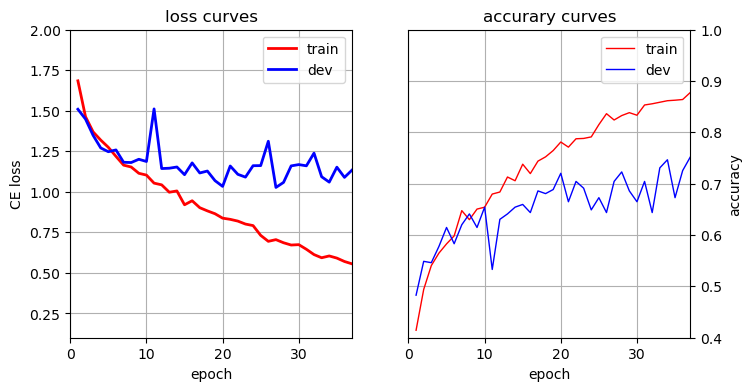

In [3]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [4]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4433, wav=0.4667
2-test accurary: segs=0.4267, wav=0.4545
3-test accurary: segs=0.4452, wav=0.4697
4-test accurary: segs=0.4636, wav=0.4818
5-test accurary: segs=0.4545, wav=0.4939
6-test accurary: segs=0.4379, wav=0.4606
7-test accurary: segs=0.4545, wav=0.4758
8-test accurary: segs=0.4500, wav=0.4606
9-test accurary: segs=0.4936, wav=0.5303
10-test accurary: segs=0.4355, wav=0.4758
11-test accurary: segs=0.3582, wav=0.3758
12-test accurary: segs=0.4721, wav=0.4939
13-test accurary: segs=0.4555, wav=0.4818
14-test accurary: segs=0.4533, wav=0.4848
15-test accurary: segs=0.4700, wav=0.5091
16-test accurary: segs=0.4530, wav=0.4939
17-test accurary: segs=0.4591, wav=0.5121
18-test accurary: segs=0.4448, wav=0.4606
19-test accurary: segs=0.4564, wav=0.5091
20-test accurary: segs=0.4764, wav=0.5424
21-test accurary: segs=0.4224, wav=0.4636
22-test accurary: segs=0.4342, wav=0.4697
23-test accurary: segs=0.4930, wav=0.5545
24-test accurary: segs=0.4170, wav=0.4636
2

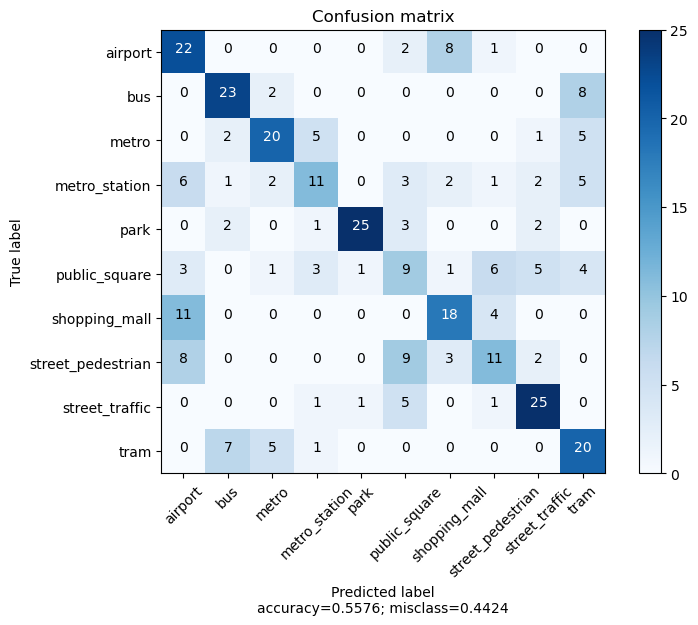

In [5]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 28)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)